In [59]:
import numpy
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [60]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v


def mapping_comparison(site_obs, site_cal, fig_title=''):
    plt.figure(figsize=(8,8))
    
    nan_indices = numpy.isnan(site_obs) | numpy.isnan(site_cal)

    # 删除包含 NaN 值的位置
    x = site_obs[~nan_indices]
    y = site_cal[~nan_indices]
    
    print(x.shape)
    print(y.shape)

    # 使用线性回归模型拟合数据
    model = LinearRegression()
    x = x.reshape(-1, 1)
    model.fit(x, y)
    y_pred = model.predict(x)
    
    # 绘制密度散点图
    xy = numpy.vstack([x.flatten(), y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x_, y_, z = x[idx], y[idx], z[idx]
    plt.scatter(x_, y_, marker='o', c=z, s=8, cmap='turbo')
    
    # 绘制散点图和回归线
#     plt.scatter(x, y, color='b')
    plt.plot(x, y_pred, color='red')

    # 添加标签
    plt.title(fig_title)
    plt.xlabel('Net radiation observed at site (W/m²)')
    plt.ylabel('Net radiation calculated for ET (W/m²)')
    
    # 计算散点个数
    num = numpy.count_nonzero(~numpy.isnan(x))

    # 计算回归方程
    equation = f'y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}'

    # 计算评估指标
    r2 = r2_score(y, y_pred)
    rmse = numpy.sqrt(mean_squared_error(y, y_pred))
    bias = numpy.mean(y_pred - y)
    mae = mean_absolute_error(y, y_pred)

    print('N:', num)
    print('R²:', r2)
    print('RMSE:', rmse)
    print('Bias:', bias)
    print('MAE', mae)

    plt.annotate(f'N: {num:d}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10)
    plt.annotate(equation, xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10)
    plt.annotate(f'R²: {r2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10)
    plt.annotate(f'RMSE: {rmse:.2f}', xy=(0.05, 0.80), xycoords='axes fraction', fontsize=10)
    plt.annotate(f'Bias: {bias:.2f}', xy=(0.05, 0.75), xycoords='axes fraction', fontsize=10)
    plt.annotate(f'MAE: {mae:.2f}', xy=(0.05, 0.70), xycoords='axes fraction', fontsize=10)

    # 显示图形
    plt.show()


(19661,)
(19661,)
N: 19661
R²: 0.9558837196221879
RMSE: 51.731627860073424
Bias: -3.561929303520446e-15
MAE 30.445100453161242


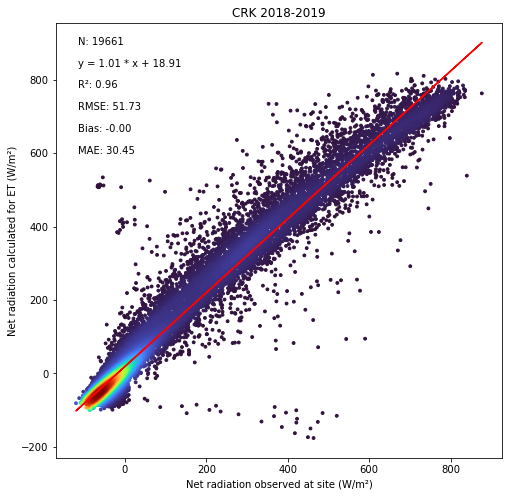

In [66]:
SITE_OBS_CSV = '/disk2/Data/FluxSite4ET/validation/CRK_2018_2019_Rnet.csv'
obs_timelist, site_obs = read_site_csv(SITE_OBS_CSV)
SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/CRK_Rnet.csv'
cal_timelist, site_cal = read_site_csv(SITE_CAL_CSV)

mapping_comparison(site_obs, site_cal, 'CRK 2018-2019')

(19448,)
(19448,)
N: 19448
R²: 0.9491353244835841
RMSE: 55.83467608187845
Bias: -6.173040962259694e-15
MAE 30.183226097768816


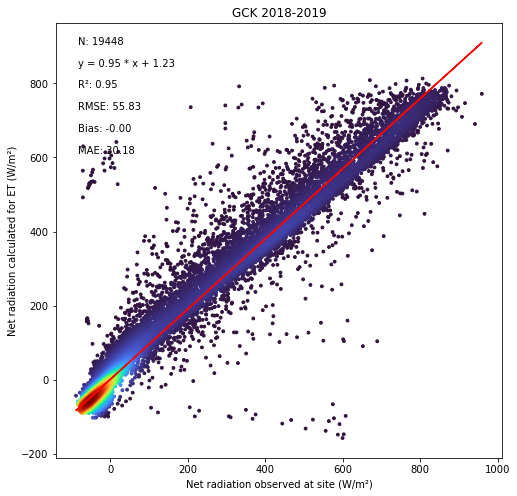

In [62]:
SITE_OBS_CSV = '/disk2/Data/FluxSite4ET/validation/GCK_2018_2019_Rnet.csv'
obs_timelist, site_obs = read_site_csv(SITE_OBS_CSV)
SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/GCK_Rnet.csv'
cal_timelist, site_cal = read_site_csv(SITE_CAL_CSV)

mapping_comparison(site_obs, site_cal, 'GCK 2018-2019')

(19309,)
(19309,)
N: 19309
R²: 0.9473561439014029
RMSE: 57.150200360841126
Bias: 8.478380357301107e-15
MAE 32.66528435134089


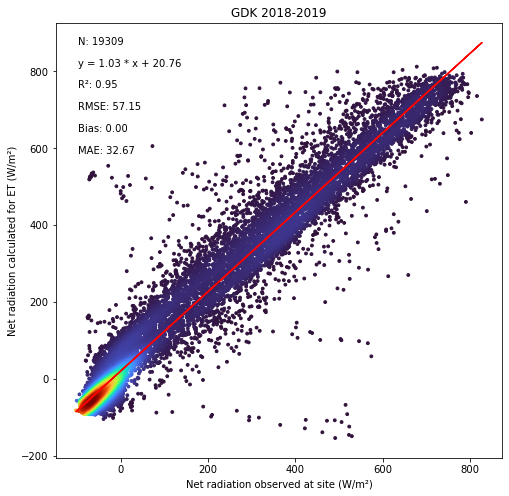

In [63]:
SITE_OBS_CSV = '/disk2/Data/FluxSite4ET/validation/GDK_2018_2019_Rnet.csv'
obs_timelist, site_obs = read_site_csv(SITE_OBS_CSV)
SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/GDK_Rnet.csv'
cal_timelist, site_cal = read_site_csv(SITE_CAL_CSV)

mapping_comparison(site_obs, site_cal, 'GDK 2018-2019')

(7388,)
(7388,)
N: 7388
R²: 0.9108127099195186
RMSE: 74.64523952561848
Bias: -4.92417272210573e-16
MAE 45.934633228418605


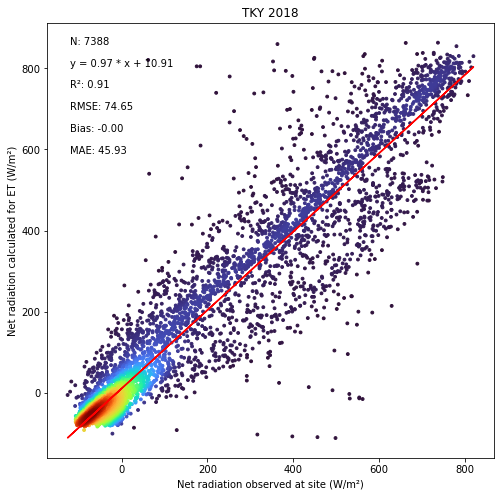

In [64]:
SITE_OBS_CSV = '/disk2/Data/FluxSite4ET/validation/TKY_2018_2019_Rnet.csv'
obs_timelist, site_obs = read_site_csv(SITE_OBS_CSV)
SITE_CAL_CSV = '/disk2/Data/FluxSite4ET/TKY_Rnet.csv'
cal_timelist, site_cal = read_site_csv(SITE_CAL_CSV)

mapping_comparison(site_obs, site_cal, 'TKY 2018')